In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Cargar el dataset de MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar las imágenes (28x28) a vectores de 784 dimensiones
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
def build_encoder(input_dim, latent_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    latent = layers.Dense(latent_dim, activation='relu')(x)
    return models.Model(inputs, latent, name="encoder")

# Parámetros del encoder
input_dim = 28 * 28  # Tamaño de entrada (dimensión de la imagen aplanada)
latent_dim = 32  # Dimensión del espacio latente (representación comprimida)
encoder = build_encoder(input_dim, latent_dim)
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
def build_decoder(latent_dim, output_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(64, activation='relu')(latent_inputs)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(output_dim, activation='sigmoid')(x)
    return models.Model(latent_inputs, outputs, name="decoder")

# Parámetros del decoder
output_dim = 28 * 28  # Tamaño de la salida (dimensión de la imagen aplanada)
decoder = build_decoder(latent_dim, output_dim)
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Conectar el encoder y el decoder
autoencoder_input = layers.Input(shape=(input_dim,))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)

# Crear el modelo autoencoder
autoencoder = models.Model(autoencoder_input, decoded_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Entrenar el autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3400 - val_loss: 0.1682
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1595 - val_loss: 0.1397
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1375 - val_loss: 0.1259
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1253 - val_loss: 0.1176
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1179 - val_loss: 0.1122
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1131 - val_loss: 0.1090
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1098 - val_loss: 0.1061
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1067 - val_loss: 0.1030
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1035 - val_loss: 0.1008
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1019 - val_loss: 0.0994
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1001 - val_loss: 0.0980
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [6]:
encoded_imgs = encoder.predict(x_test)
print("Representación comprimida:", encoded_imgs.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
Representación comprimida: (10000, 32)


In [7]:
decoded_imgs = decoder.predict(encoded_imgs)
print("Imágenes reconstruidas:", decoded_imgs.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
Imágenes reconstruidas: (10000, 784)


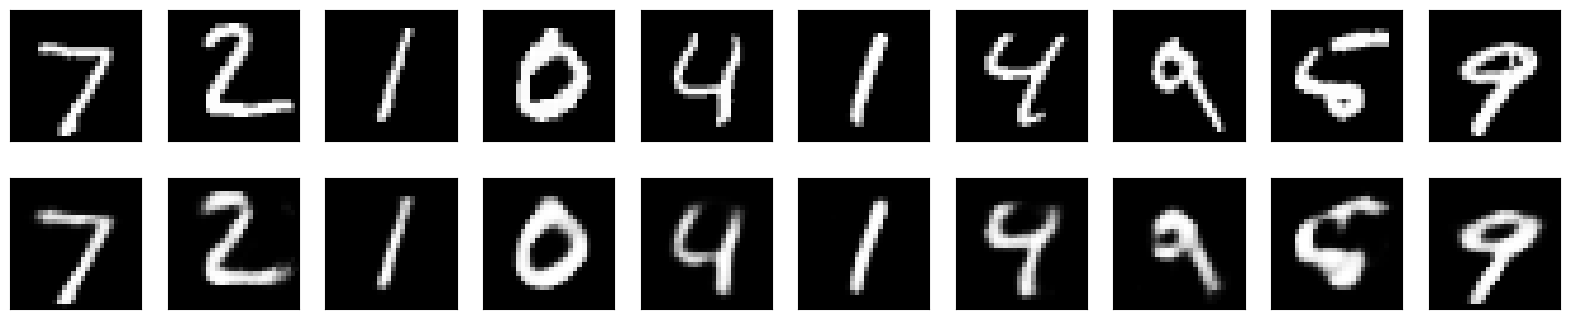

In [8]:
# Mostrar algunas imágenes originales y reconstruidas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()